<a href="https://www.kaggle.com/code/aathirasanthosh/exploratory-data-analysis-using-netflix-data?scriptVersionId=124641571" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image

In [2]:
#loading the dataset
netflix = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

#inspecting dataset
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
#inspecting data further
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
#counting null values for each column
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

We can see that this dataset has a total of 8807 rows and 12 columns. The following columns have null values that need to be cleaned: 
* director - 2,634 null values
* cast - 825 null values
* country - 831 null values 
* date_added - 10 null values
* rating - 4 null values
* duration - 3 null values

In [5]:
#counting total null values across entire dataset
netflix.isnull().sum().sum()

4307

Dropping these many rows in the director, cast and country columns would lead to a large loss of information so we shall just replace the null values in those columns with a missing category instead. For the date added, duration and rating columns, since the null value counts are so low, we shall just drop them from the dataset.

In [6]:
#replacing null values with a missing category
netflix['director'].fillna("Director Unavailable", inplace=True)
netflix['cast'].fillna("Cast Unavailable", inplace=True)
netflix['country'].fillna("Country Unavailable", inplace=True)
netflix.dropna(subset=["date_added", "rating", "duration"], inplace=True)

In [7]:
#checking to see if dataset has anymore null values remaining
netflix.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

All the columns now report that there are no null values! We are now ready to use this datast to conduct our exploratory data analysis.

**Analyzing Netflix content by type**

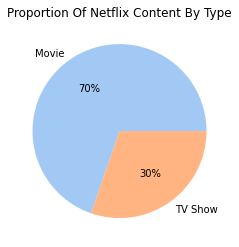

In [8]:
plt.title('Proportion Of Netflix Content By Type')
colors = sns.color_palette('pastel')
plt.pie(netflix['type'].value_counts(), labels = netflix['type'].value_counts().index, colors = colors, autopct='%.0f%%')
plt.show()

We see that 70% of the content available on Netflix are movies, and only 30% are tv shows. Let's investigate how this proportion has changed over the years.

**Analyzing trends in Netflix content over the years**

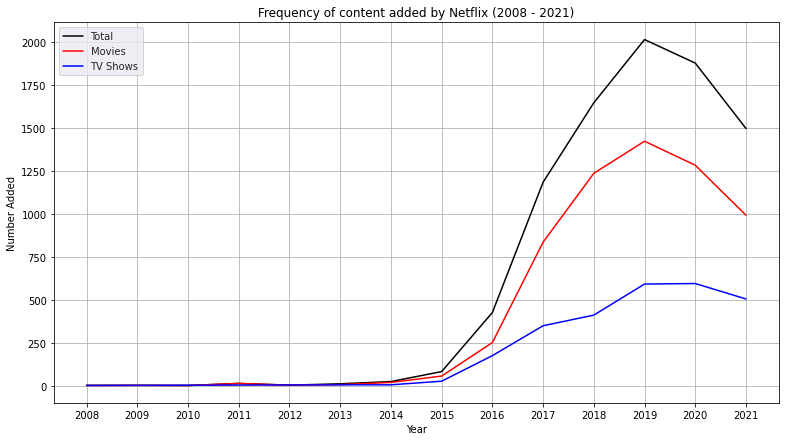

In [9]:
#Creating Year Added column based on Date Added
netflix['year_added'] = pd.DatetimeIndex(netflix['date_added']).year
netflix['year_added'].apply(lambda x: int(x))

#temp dataframes to use for plots
netflix_total_df = netflix.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
netflix_movies_df = netflix[netflix['type']=="Movie"].year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
netflix_tv_df = netflix[netflix['type']=="TV Show"].year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})

fig, ax = plt.subplots(figsize=(13, 7))
plt.title("Frequency of content added by Netflix (2008 - 2021)")
plt.xlabel("Year")
plt.ylabel("Number Added")
ax.set_xticks(np.arange(2008, 2022, 1))
sns.set_style("dark")
sns.lineplot(data=netflix_total_df, x="year", y="count", color="black")
sns.lineplot(data=netflix_movies_df, x = "year", y="count", color="red")
sns.lineplot(data=netflix_tv_df, x = "year", y="count", color="blue")
plt.legend(['Total', 'Movies', "TV Shows"])
plt.grid()
plt.show()

Based on the plot above, we can observe that the number of movies and tv shows added by Netflix started increasing drastically since 2015. A larger proportion of movies are added every year compared to TV shows. However, we observe that there has been a significant reduction in the number of movies and TV shows added since 2019. A likely reason for this could be due to the impact of the COVID-19 pandemic, which resulted in a lot of production houses and studios halting filming leading to fewer new releases. This decrease appears to be slightly less severe for TV shows compared to movies. It's possible that more people may be interested in watching tv shows rather than movies while being stuck at home and Netflix is adding content accordingly.

**Exploring Top Netflix genres**

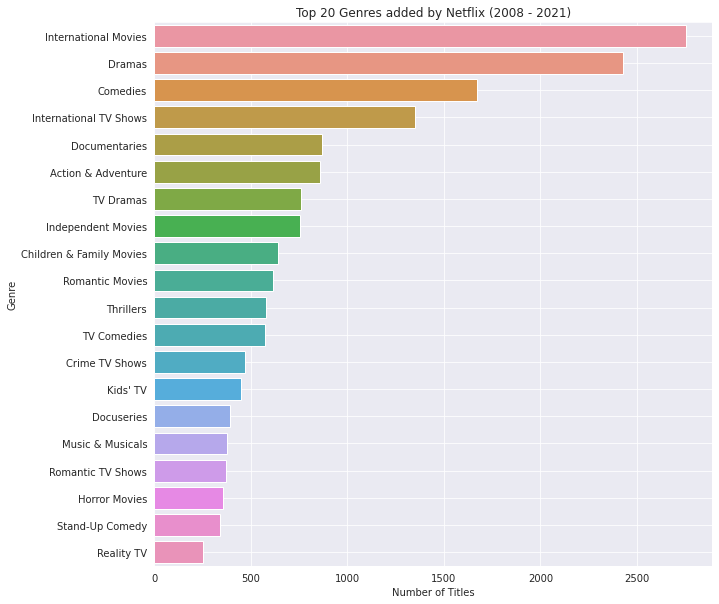

In [10]:
#creating a temp dataframe containing all titles, genres and year added
genres = netflix.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
genres_df = pd.DataFrame()
genres_df['genre'] = genres
years = netflix.set_index('title').year_added
description = netflix.set_index('title').description
a = pd.merge(genres_df, years, left_index=True, right_index=True)
temp = pd.merge(a, description, left_index=True, right_index=True)

plt.figure(figsize=(10, 10))
sns.countplot(y = 'genre', data = temp, order=temp.genre.value_counts().iloc[:20].index)
plt.title('Top 20 Genres added by Netflix (2008 - 2021)')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.grid()
plt.show()

We see that the Top 5 genres added by Netflix are International Movies, Dramas, Comedies, International TV shows and documentaries. Let's explore how these genres changed over the years.

In [11]:
#temp dataframes to use for line plots
international_movies_df = temp[temp['genre']=='International Movies'].year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
dramas_df = temp[temp['genre']=='Dramas'].year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
comedies_df = temp[temp['genre']=='Comedies'].year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
international_tv_df = temp[temp['genre']=='International TV Shows'].year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
documentaries_df = temp[temp['genre']=='Documentaries'].year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})

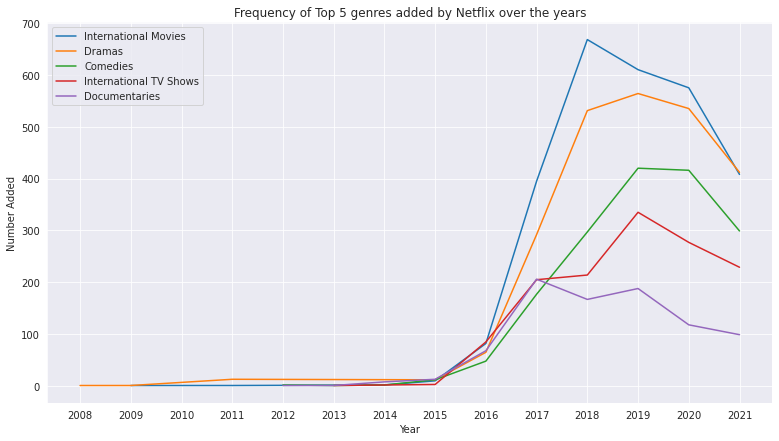

In [12]:
fig, ax = plt.subplots(figsize=(13, 7))
plt.title("Frequency of Top 5 genres added by Netflix over the years")
plt.xlabel("Year")
plt.ylabel("Number Added")
ax.set_xticks(np.arange(2008, 2022, 1))
sns.lineplot(data=international_movies_df, x="year", y="count")
sns.lineplot(data=dramas_df, x="year", y="count")
sns.lineplot(data=comedies_df, x="year", y="count")
sns.lineplot(data=international_tv_df, x="year", y="count")
sns.lineplot(data=documentaries_df, x="year", y="count")
plt.legend(['International Movies', 'Dramas', "Comedies", "International TV Shows", "Documentaries"])
plt.grid()
plt.show()

We see that there has been a decline in the number of documentaries added by Netflix since 2017 despite it being a top genre. The number of comedies added by Netflix surpassed that of International TV Shows and Documentaries in 2017 and appears to be the only genre that did not experience a significant decline during the pandemic. Lastly, although International Movies is the most frequent genre added by Netflix, its frequency has been on a steady decline since 2018 - well before the pandemic hit.

**Creating Wordclouds for each Top Netflix genre**

Let's explore the most frequent words used in the description for each Netflix genre to see if there are any similarities. 

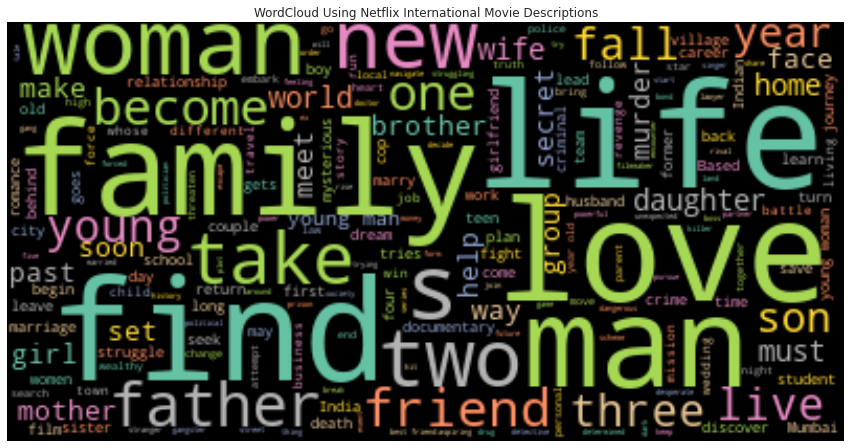

In [13]:
internation_movies_desc_df = temp[temp['genre']=='International Movies']
international_movies_text = " ".join(i for i in internation_movies_desc_df.description)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black", colormap='Set2').generate(international_movies_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud Using Netflix International Movie Descriptions")
plt.show()

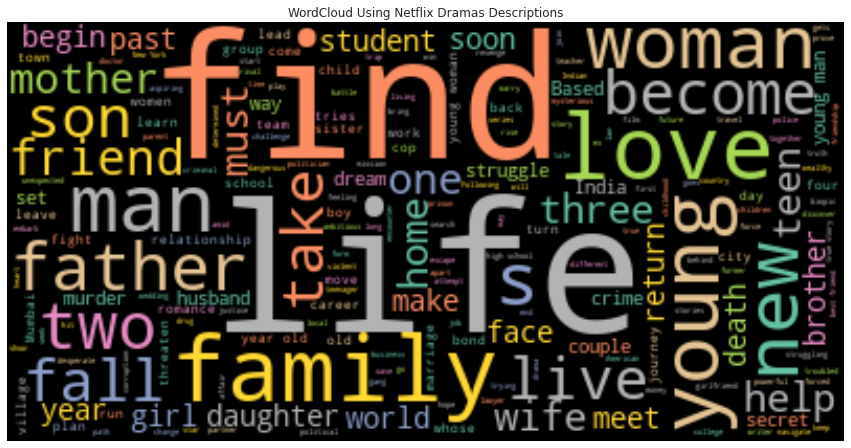

In [14]:
drama_desc_df = temp[temp['genre']=='Dramas']
drama_text = " ".join(i for i in drama_desc_df.description)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black", colormap='Set2').generate(drama_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud Using Netflix Dramas Descriptions")
plt.show()

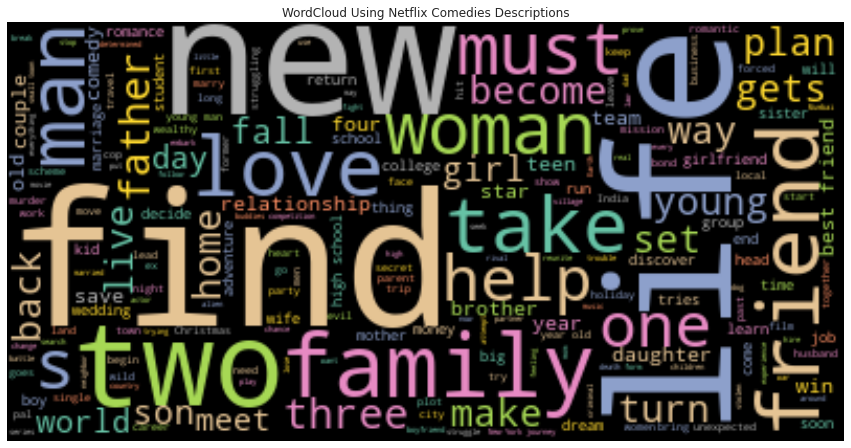

In [15]:
comedy_desc_df = temp[temp['genre']=='Comedies']
comedy_text = " ".join(i for i in comedy_desc_df.description)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black", colormap='Set2').generate(comedy_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud Using Netflix Comedies Descriptions")
plt.show()

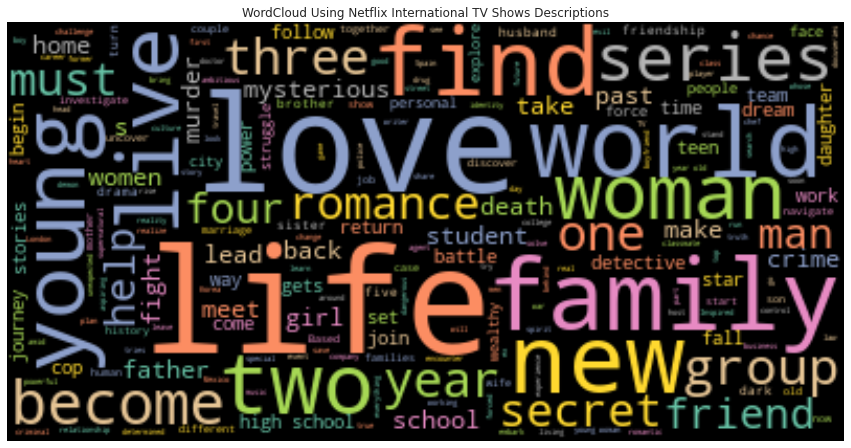

In [16]:
international_tv_desc_df = temp[temp['genre']=='International TV Shows']
international_tv_text = " ".join(i for i in international_tv_desc_df.description)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black", colormap='Set2').generate(international_tv_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud Using Netflix International TV Shows Descriptions")
plt.show()

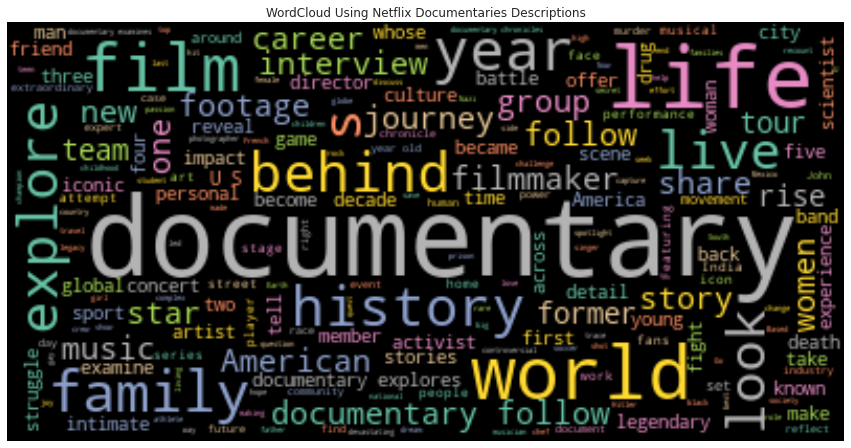

In [17]:
documentaries_desc_df = temp[temp['genre']=='Documentaries']
documentaries_text = " ".join(i for i in documentaries_desc_df.description)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black", colormap='Set2').generate(documentaries_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud Using Netflix Documentaries Descriptions")
plt.show()

We see that there is a lot of overlapping words among the Top 5 Netflix genres which is not surprising since each title can belong to multiple genres. Common themes appear to be about love, life and family.

**Exploring countries where Netflix titles are added from**

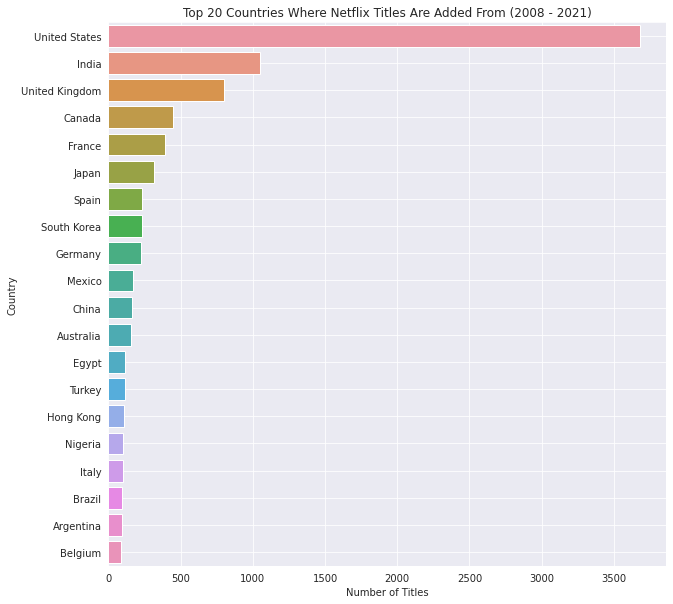

In [18]:
countries_df = netflix.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
countries_df = countries_df[countries_df != 'Country Unavailable']
plt.figure(figsize=(10,10))
g = sns.countplot(y = countries_df, order=countries_df.value_counts().index[:20])
plt.title('Top 20 Countries Where Netflix Titles Are Added From (2008 - 2021)')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.grid()
plt.show()

We see that an overwhelming majority of the Netflix titles are from the United States, followed by India, United Kingdom, Canada and France.